In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from IPython.display import Image
%matplotlib inline 
sns.set(style="ticks")
import scipy.stats as stats

In [13]:
def impute_column(dataset, column, strategy_param, fill_value_param=None):

    temp_data = dataset[[column]].values
    size = temp_data.shape[0]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imputer = SimpleImputer(strategy=strategy_param, 
                            fill_value=fill_value_param)
    all_data = imputer.fit_transform(temp_data)
    
    missed_data = temp_data[mask_missing_values_only]
    filled_data = all_data[mask_missing_values_only]
    
    return all_data.reshape((size,)), filled_data, missed_data

In [14]:
def diagnostic_plots(df, variable):
    plt.figure(figsize=(15,6))
    # гистограмма
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.show()

In [15]:
df = pd.read_csv('D:\\Ботва\\Магистратура\\2сем\\ММО\\ЛАБ2\\stars.csv')
df.head(30)

,Temperature,Otnosit_yarkost,Otnosit_radius,Abs_Velichina,Color,Spectr_class,Type
0,3068,NaN,0.17000,16.120,Red,M,0
1,3042,0.000500,NaN,16.600,Red,M,0
2,2600,0.000300,0.10200,NaN,Red,M,0
3,2800,0.000200,NaN,16.650,Red,M,0
4,1939,NaN,0.10300,20.060,NaN,M,0
5,2840,0.000650,0.11000,16.980,Red,M,0
6,2637,0.000730,0.12700,17.220,Red,M,0
7,2600,0.000400,NaN,17.400,Red,M,0
8,2650,0.000690,0.11000,17.450,Red,M,0
9,2700,0.000180,NaN,16.050,Red,M,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      240 non-null    int64  
 1   Otnosit_yarkost  237 non-null    float64
 2   Otnosit_radius   228 non-null    float64
 3   Abs_Velichina    237 non-null    float64
 4   Color            233 non-null    object 
 5   Spectr_class     240 non-null    object 
 6   Type             240 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 13.2+ KB


In [17]:
#Устранение пропусков с использованием метода заполнения медианой
df_chisl = df.select_dtypes(include=[np.number])
median_o = df_chisl['Otnosit_yarkost'].median()
df_chisl['Otnosit_yarkost'] = df['Otnosit_yarkost'].fillna(median_o)

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
df_chisl.head(30)

,Temperature,Otnosit_yarkost,Otnosit_radius,Abs_Velichina,Type
0,3068,0.153000,0.17000,16.120,0
1,3042,0.000500,NaN,16.600,0
2,2600,0.000300,0.10200,NaN,0
3,2800,0.000200,NaN,16.650,0
4,1939,0.153000,0.10300,20.060,0
5,2840,0.000650,0.11000,16.980,0
6,2637,0.000730,0.12700,17.220,0
7,2600,0.000400,NaN,17.400,0
8,2650,0.000690,0.11000,17.450,0
9,2700,0.000180,NaN,16.050,0


In [19]:
#Устранение пропусков с использованием метода заполнения средним значением
df_sr = df.select_dtypes(include=[np.number])
name = 'Abs_Velichina'
df_sr.loc[df_sr[name].isnull(), name] = df_sr.groupby('Type')[name].transform('mean')

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [20]:
df_sr.head(30)

,Temperature,Otnosit_yarkost,Otnosit_radius,Abs_Velichina,Type
0,3068,NaN,0.17000,16.120000,0
1,3042,0.000500,NaN,16.600000,0
2,2600,0.000300,0.10200,17.534359,0
3,2800,0.000200,NaN,16.650000,0
4,1939,NaN,0.10300,20.060000,0
5,2840,0.000650,0.11000,16.980000,0
6,2637,0.000730,0.12700,17.220000,0
7,2600,0.000400,NaN,17.400000,0
8,2650,0.000690,0.11000,17.450000,0
9,2700,0.000180,NaN,16.050000,0


In [21]:
#Устранение пропусков с использованием метода заполнения наиболее распространенным значением категории
df_raspr = df[['Color', 'Spectr_class']].copy() 
Color_new, _, _ = impute_column(df_raspr, 'Color', 'most_frequent')
df_raspr['Color'] = Color_new

In [22]:
df_raspr.head(30)

,Color,Spectr_class
0,Red,M
1,Red,M
2,Red,M
3,Red,M
4,Red,M
5,Red,M
6,Red,M
7,Red,M
8,Red,M
9,Red,M


In [23]:
#Кодирование категориальных признаков
df_kod = df[['Color', 'Spectr_class']]

In [24]:
df_kod['Spectr_class'].unique()

array(['M', 'B', 'A', 'F', 'O', 'K', 'G'], dtype=object)

In [25]:
df_kod.loc[df['Spectr_class'] == 'M', 'Spectr_class'] = 1
df_kod.loc[df['Spectr_class'] == 'B', 'Spectr_class'] = 2
df_kod.loc[df['Spectr_class'] == 'A', 'Spectr_class'] = 3
df_kod.loc[df['Spectr_class'] == 'F', 'Spectr_class'] = 4
df_kod.loc[df['Spectr_class'] == 'O', 'Spectr_class'] = 5
df_kod.loc[df['Spectr_class'] == 'K', 'Spectr_class'] = 6
df_kod.loc[df['Spectr_class'] == 'G', 'Spectr_class'] = 7
df_kod['Spectr_class'] = pd.to_numeric(df_kod['Spectr_class'])

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



In [26]:
df_kod['Spectr_class'].unique()

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\pandas\plotting\_matplotlib\tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


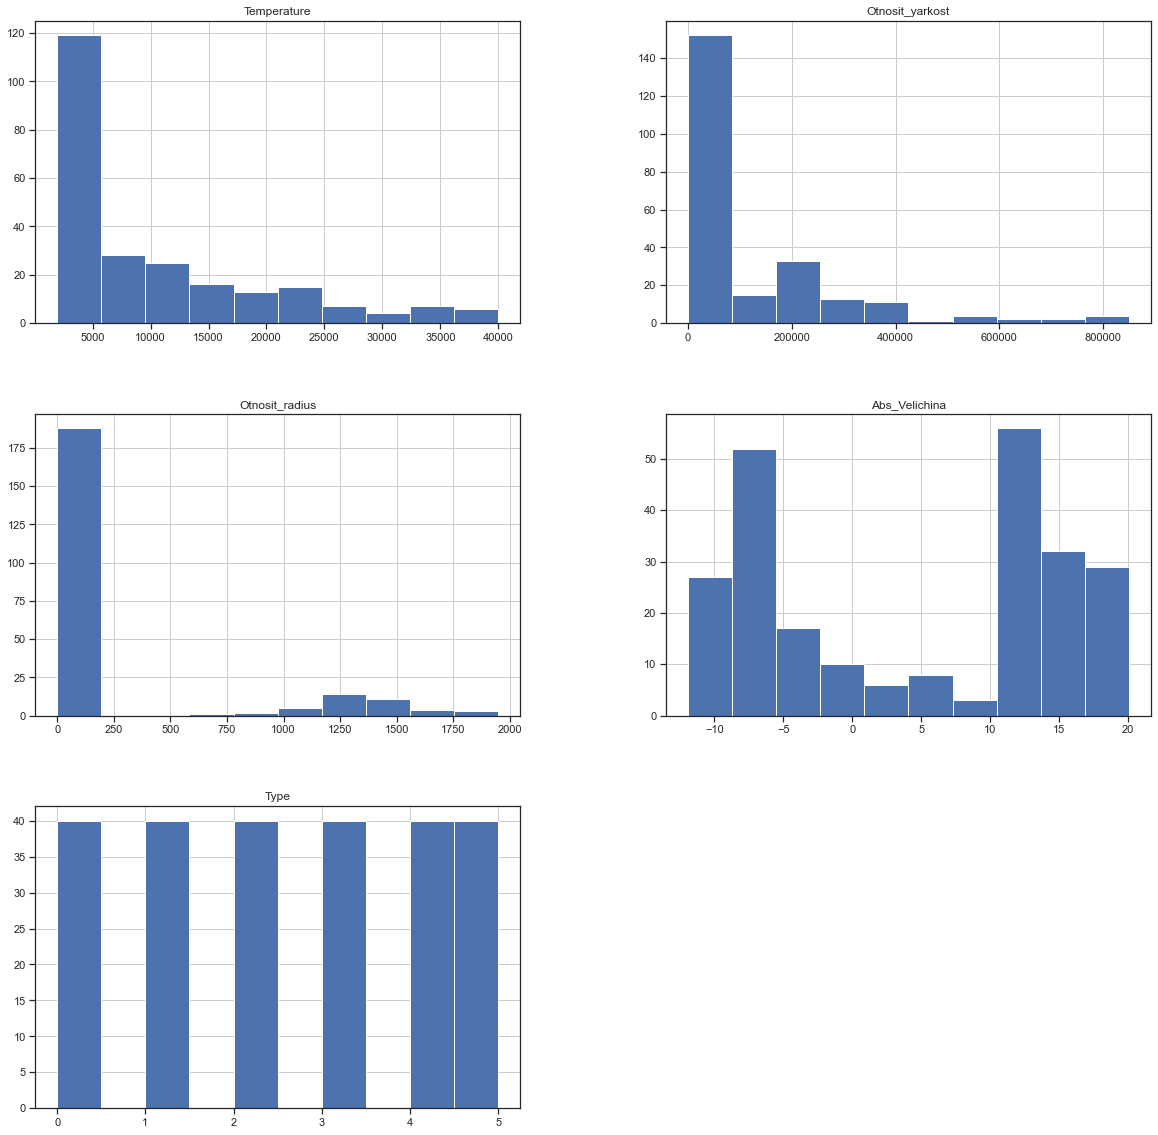

In [27]:
#Нормализация числовых признаков
df_sr.hist(figsize=(20,20))
plt.show()

c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\users\sveta\documents\virtualenvs\tensorflow\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


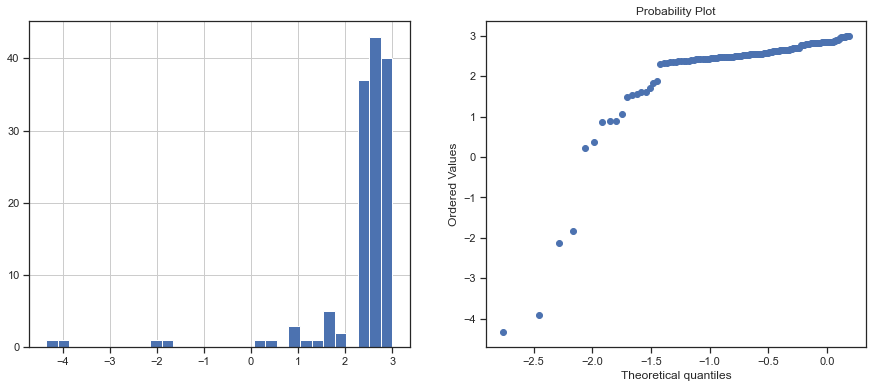

In [28]:
df_sr['Abs_Velichina_log'] = np.log(df_sr['Abs_Velichina'])
diagnostic_plots(df_sr, 'Abs_Velichina_log')